## Work Duration Binning

In [318]:
import pandas as pd
import numpy as np

#df = pd.read_csv('new_combined_with_text_data.csv')

df = pd.read_csv('updated_quitting_predictor_data.csv')

df['time_duration_1'].fillna(0, inplace=True)
df['time_duration_2'].fillna(0, inplace=True)
df['time_duration_3'].fillna(0, inplace=True)
df['time_duration_4'].fillna(0, inplace=True)
df['time_duration_5'].fillna(0, inplace=True)


/var/folders/74/37xhv12j1_b0bpxcvmn65x_h0000gn/T/ipykernel_48123/1758610947.py:6: DtypeWarning: Columns (61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('updated_quitting_predictor_data.csv')


In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['time_duration_2'],bins = 72, range = (0,72))
plt.show()

In [ ]:
plt.hist(df['time_duration_3'],bins = 72, range = (0,72))
plt.show()

In [ ]:
plt.hist(df['time_duration_4'],bins = 72, range = (0,72))
plt.show()

In [ ]:
plt.hist(df['time_duration_5'],bins = 72, range = (0,72))
plt.show()

In [ ]:
plt.hist(df['time_duration_2'],bins = 72, range = (0,72),label='time duration 2')
plt.hist(df['time_duration_3'],bins = 72, range = (0,72),label='time duration 3')
plt.hist(df['time_duration_4'],bins = 72, range = (0,72),label='time duration 4')
plt.hist(df['time_duration_5'],bins = 72, range = (0,72),label='time duration 5')
plt.hist(df['time_duration_6'],bins = 72, range = (0,72),label='time duration 6')
plt.hist(df['time_duration_7'],bins = 72, range = (0,72),label='time duration 7',color='violet')
plt.xlabel('time duration (months)', fontsize=12, fontweight='normal')
plt.ylabel('frequency', fontsize=12, fontweight='normal')
plt.legend()
plt.show()

In [ ]:
plt.hist(df['time_duration_2'],bins = 36, range = (0,36),label='time duration 2')
plt.hist(df['time_duration_3'],bins = 36, range = (0,36),label='time duration 3')
plt.hist(df['time_duration_4'],bins = 36, range = (0,36),label='time duration 4')
plt.hist(df['time_duration_5'],bins = 36, range = (0,36),label='time duration 5')
plt.hist(df['time_duration_6'],bins = 36, range = (0,36),label='time duration 6')
plt.hist(df['time_duration_7'],bins = 36, range = (0,36),label='time duration 7', color='violet')
plt.xlabel('time duration (months)', fontsize=12, fontweight='normal')
plt.ylabel('frequency', fontsize=12, fontweight='normal')
plt.legend()
plt.show()

In [320]:
# List of peak values
peak_values = [3.0, 12.0, 24.0, 36.0, 48.0, 60.0, 72.0, 84.0, 96.0, 108.0]

# Function to check if value is in the 'peak_values' list
def is_peak(value):
    return int(value in peak_values)

# Create the 'peaks' column using the apply method
df['peak'] = df['time_duration_2'].apply(is_peak)


def between(value):
    if value<3:
        return(0)
    elif value == 3:
        return(1)
    elif 3<value<12:
        return(2)
    elif value == 12:
        return(3)
    elif 12<value<24:
        return(4)
    elif value == 24:
        return(5)
    elif 24<value<36:
        return(6)
    elif value == 36:
        return(7)
    elif 36<value<48:
        return(8)
    elif value == 48:
        return(9)
    elif 48<value<60:
        return(10)
    elif value == 60:
        return(11)
    elif 60<value<72:
        return(12)
    elif value == 72:
        return(13)
    elif 72<value<84:
        return(14)
    elif value == 84:
        return(15)
    elif 84<value<96:
        return(16)
    elif value == 96:
        return(17)
    elif 96<value<108:
        return(18)
    elif value == 108:
        return(19)
    elif 108<value:
        return(20)
    
df['bins'] = df['time_duration_2'].apply(between)


# Display the updated dataframe
df[['time_duration_2','bins','peak']][:20]

,time_duration_2,bins,peak
0,1.0,0,0
1,23.0,4,0
2,13.0,4,0
3,9.0,2,0
4,7.0,2,0
5,34.0,6,0
6,12.0,3,1
7,12.0,3,1
8,25.0,6,0
9,45.0,8,0


In [322]:
mask_quitter = (df['Quitter']==1)
mask_nonquitter = (df['Quitter']==0)

quitter = df[mask_quitter]
nonquitter = df[mask_nonquitter]

In [323]:
q_peak = np.sum(quitter['peak']==1)
q_not_peak = np.sum(quitter['peak']==0)
q_tot = len(quitter)

print('Quitter')
print('% peak: ',q_peak/q_tot)
print('% not peak: ',q_not_peak/q_tot)

Quitter
% peak:  0.13912133891213388
% not peak:  0.8608786610878661


In [324]:
nq_peak = np.sum(nonquitter['peak']==1)
nq_tot = len(nonquitter)
nq_not_peak = np.sum(nonquitter['peak']==0)

print('NonQuitter')
print('% peak: ',nq_peak/nq_tot)
print('% not peak: ',nq_not_peak/nq_tot)

NonQuitter
% peak:  0.13583052073288332
% not peak:  0.8641694792671167


In [325]:
q_vc = quitter['bins'].value_counts().sort_index()/len(quitter)
nq_vc = nonquitter['bins'].value_counts().sort_index()/len(nonquitter)

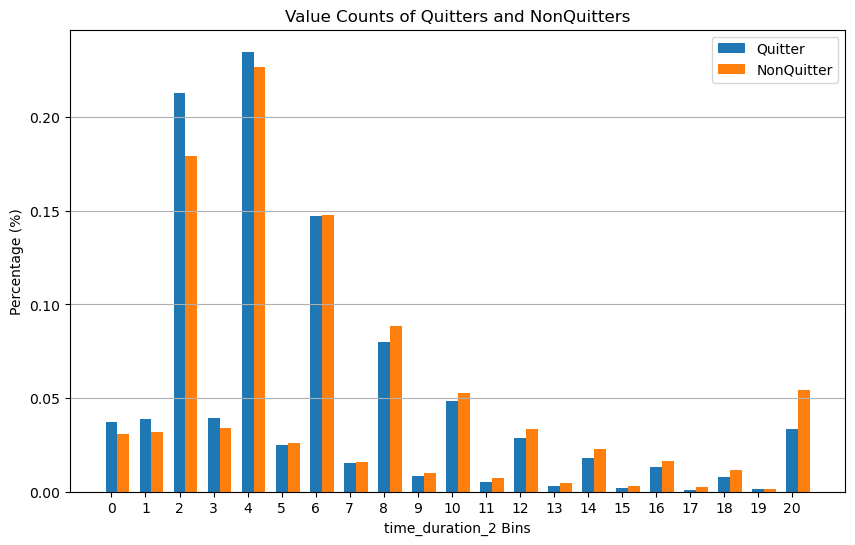

In [326]:
bar_width = 0.35
x = range(len(quitter_bins_counts))

# Plot the two bar charts side by side
plt.figure(figsize=(10, 6))
plt.bar(x, q_vc, width=bar_width, label='Quitter')
plt.bar([i + bar_width for i in x], nq_vc, width=bar_width, label='NonQuitter')
plt.xlabel('time_duration_2 Bins')
plt.ylabel('Percentage (%)')
plt.title('Value Counts of Quitters and NonQuitters')
plt.xticks(range(0,21))  
plt.grid(axis='y') 
plt.legend()
plt.show()